In [1]:
%matplotlib inline

from tqdm.notebook import trange, tqdm
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import json
import os

Read in the data.

In [2]:
base_path = os.path.join("..", "data")

In [3]:
data = {}
for file_name in tqdm(os.listdir(base_path)):
    key = file_name[:-4]
    data[key] = []
    
    f = open(os.path.join(base_path, file_name), 'r')
    first_line = True
    
    sequence_probability = []
    perplexity = []
    linearity = []
    leniency = []
    
    for line in f:
        if first_line:
            first_line = False
            continue 
            
        stripped_line = line.strip()
        csv = stripped_line.split(',')
        
        
        start_index = stripped_line.find('[')
        end_index = stripped_line.find(']')
        bad = False
        
        try:
            linearity_data = json.loads(stripped_line[start_index:end_index + 1])
            if len(linearity_data) > 5:
                model = linear_model.LinearRegression().fit(
                    [[i] for i in range(len(linearity_data))],
                    linearity_data)
                
                linearity.append(model.coef_[0]) # slope
                sequence_probability.append(float(csv[0]))
                perplexity.append(float(csv[1]))
                leniency.append(float(csv[-1]))
            else:
                bad = True
        except Exception as e:
            bad = True
        
    if bad:
        print(f'{key} did not always have enough datapoints.')
            
    data[key].append(sequence_probability)
    data[key].append(perplexity)
    data[key].append(linearity)
    data[key].append(leniency)

    f.close()

custom_50_ngram_5 did not always have enough datapoints.
custom_50_ngram_4 did not always have enough datapoints.
smb2_50_backoff_5 did not always have enough datapoints.
sml_50_backoff_5 did not always have enough datapoints.
sml_50_backoff_4 did not always have enough datapoints.
smb2_50_backoff_6 did not always have enough datapoints.
sml_50_backoff_6 did not always have enough datapoints.
sml_50_backoff_3 did not always have enough datapoints.
smb2_50_backoff_2 did not always have enough datapoints.



## Hex Plots

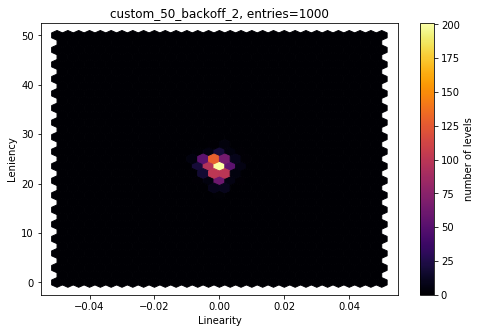

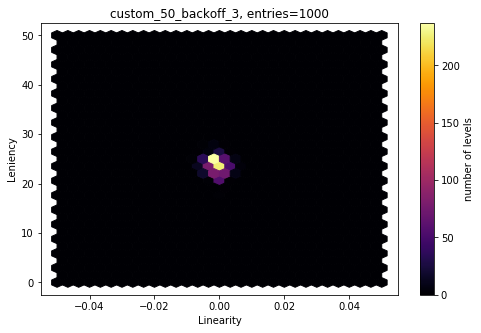

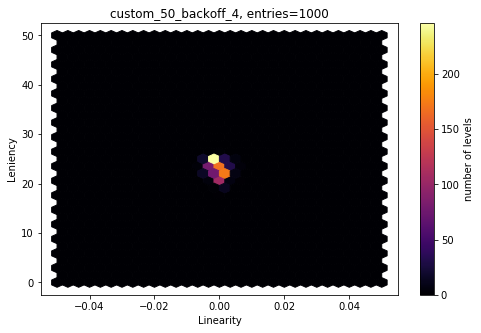

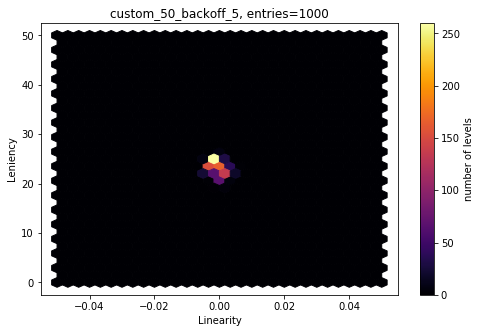

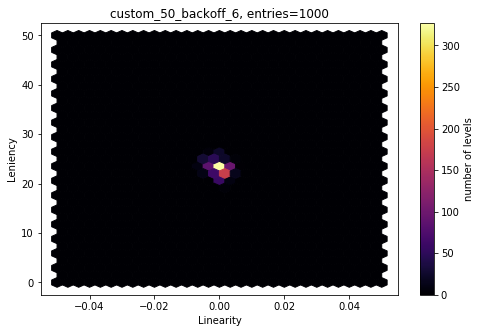

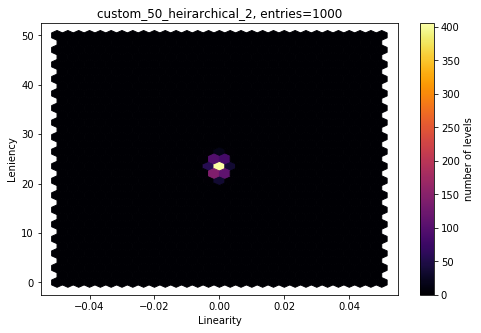

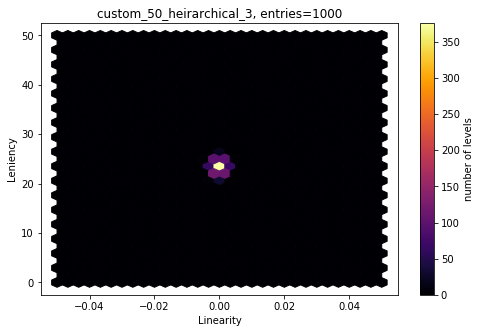

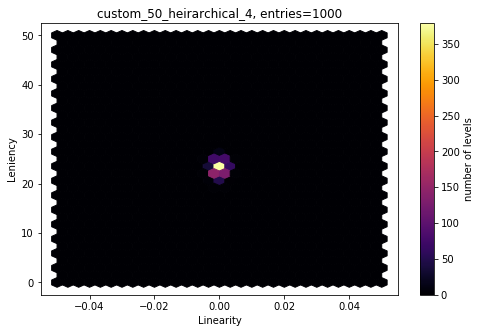

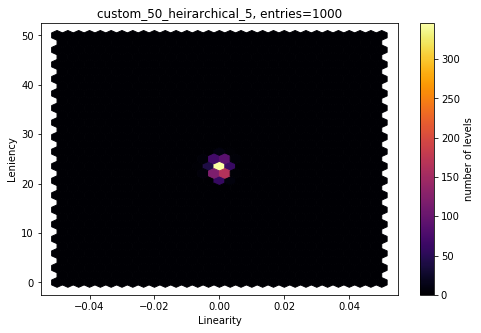

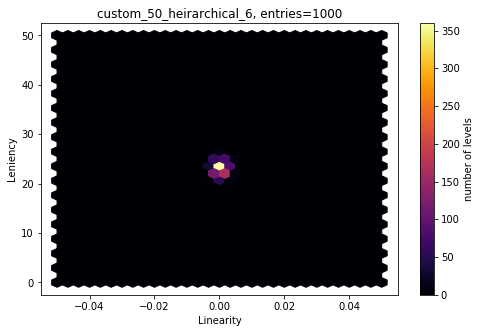

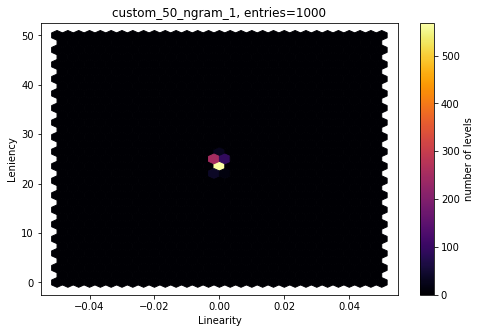

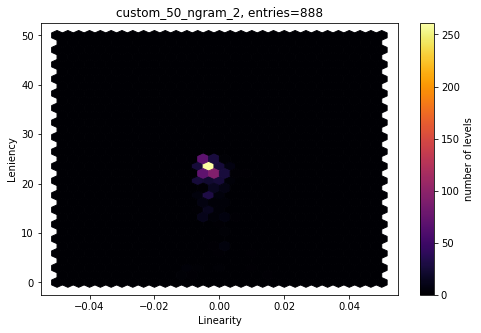

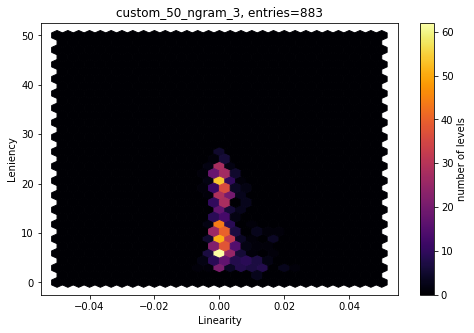

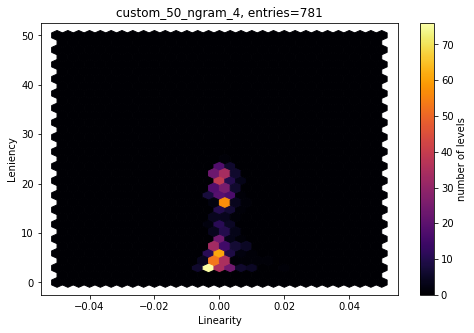

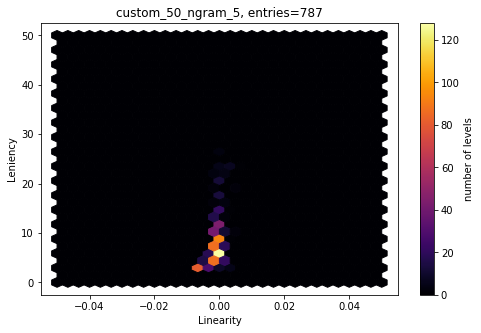

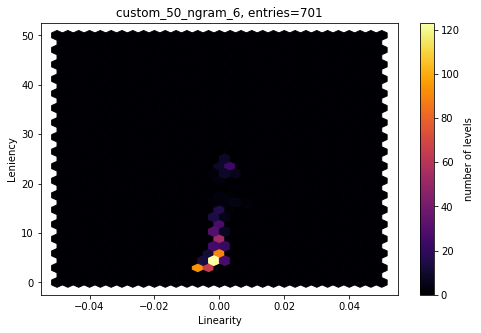

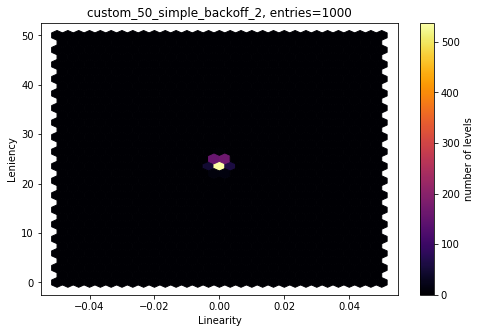

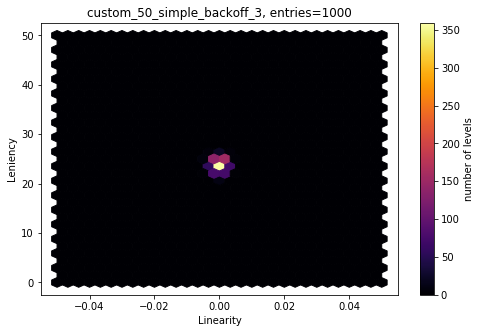

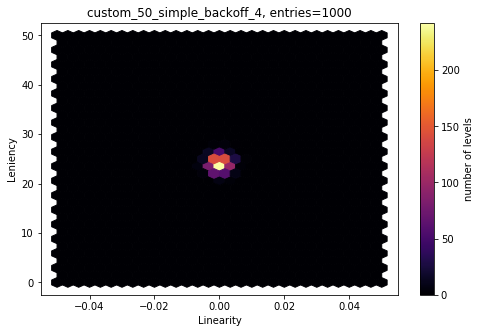

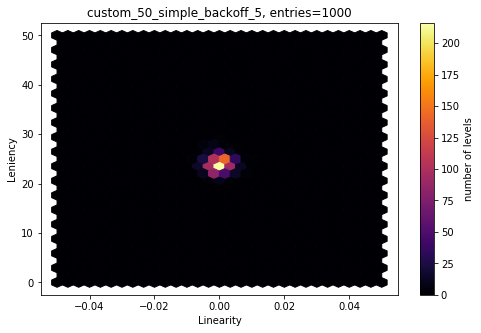

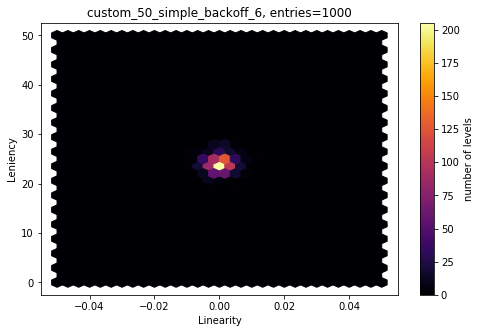

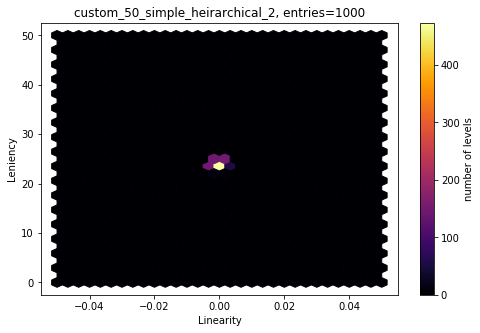

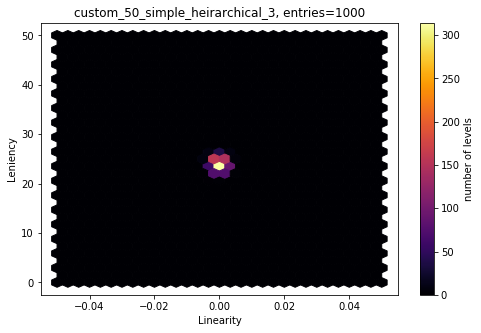

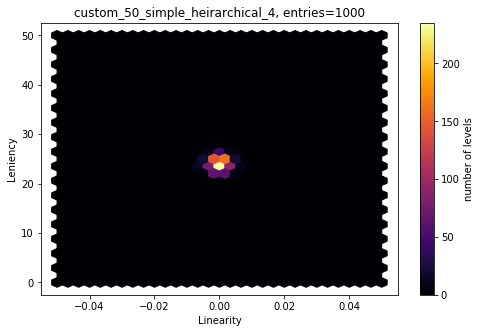

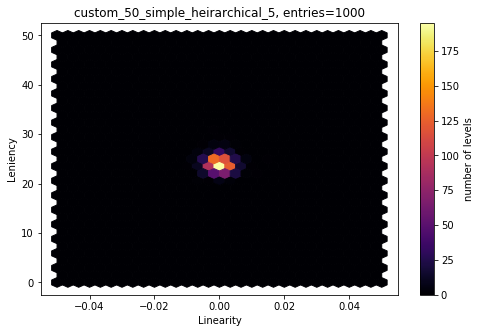

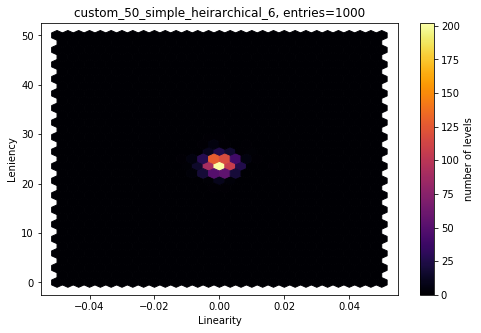

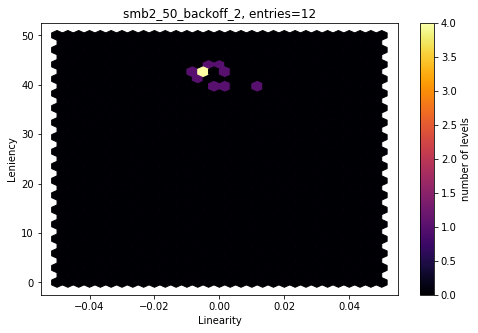

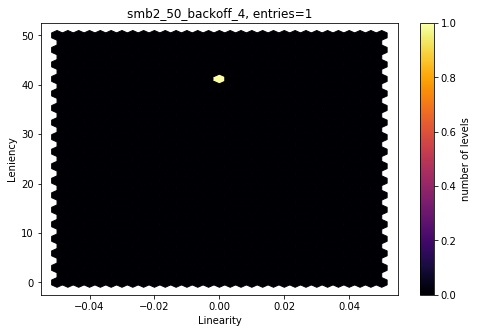

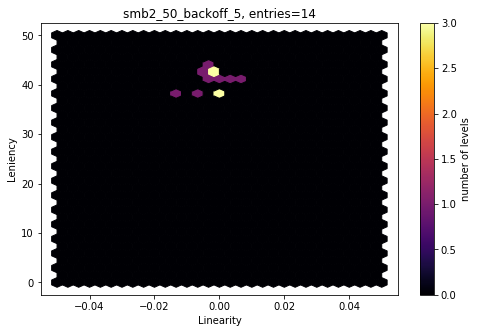

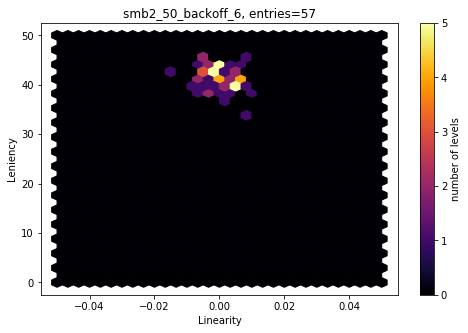

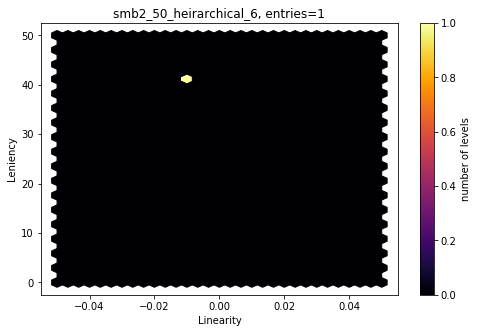

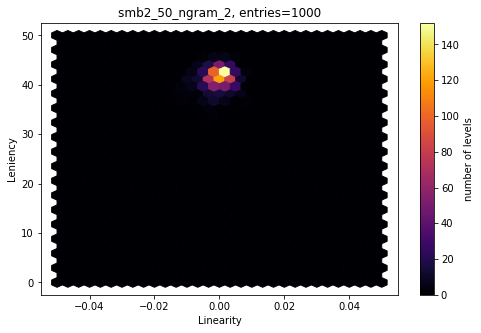

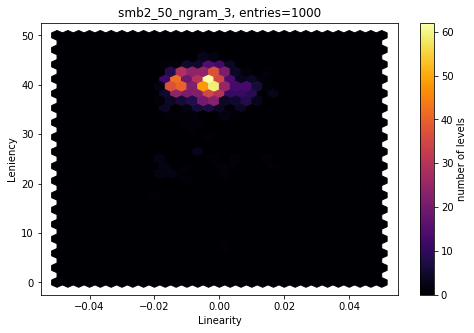

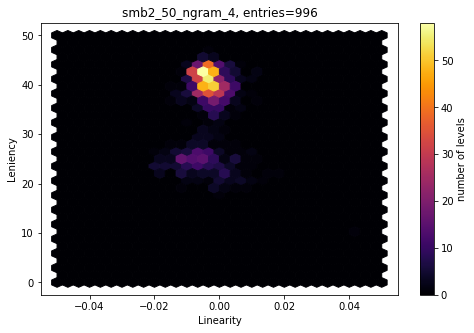

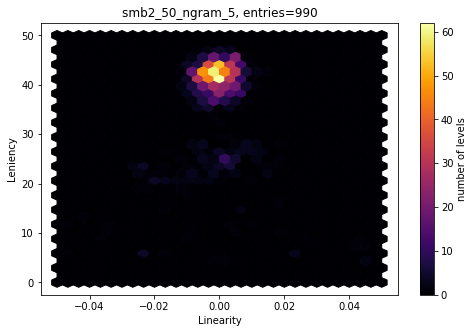

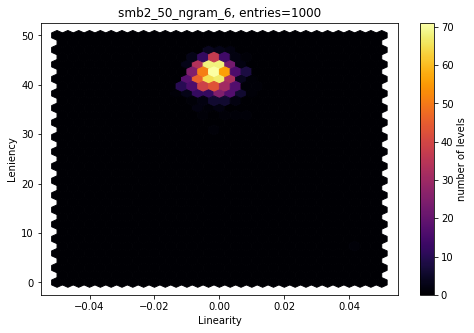

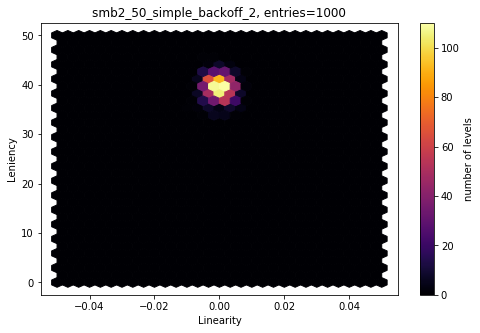

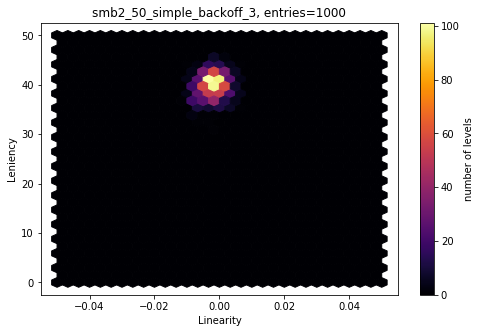

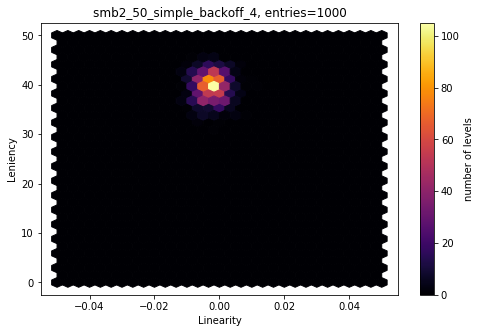

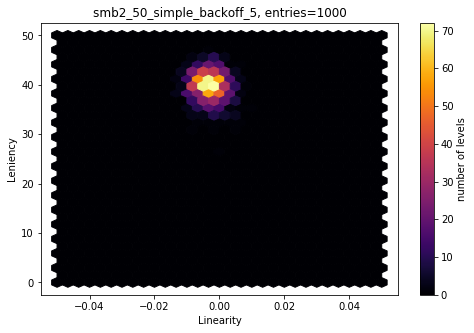

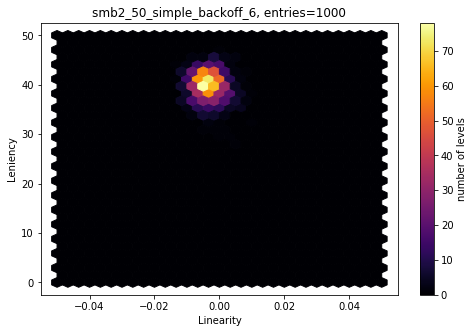

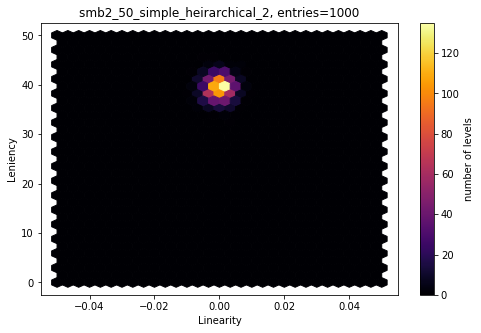

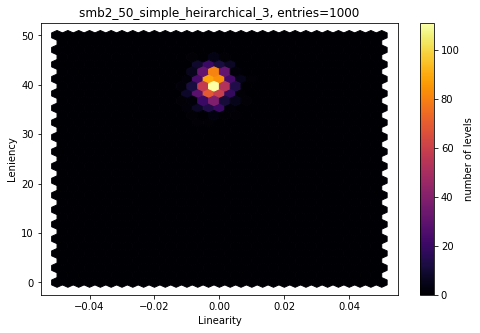

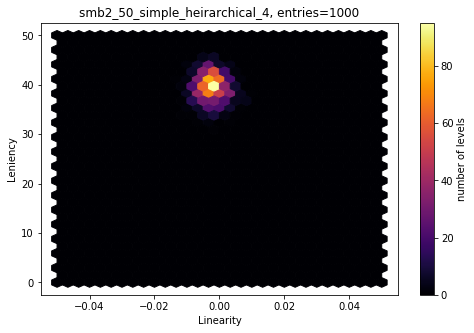

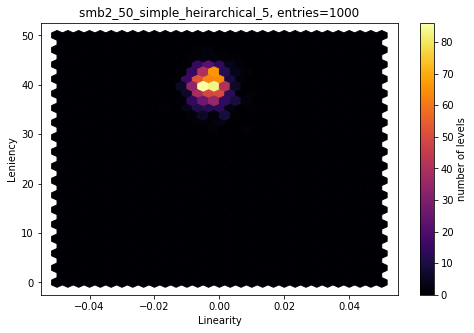

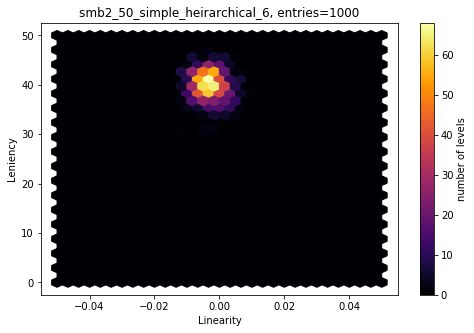

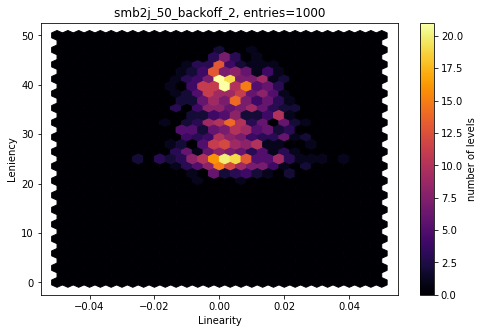

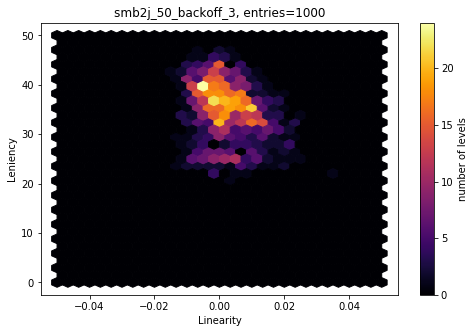

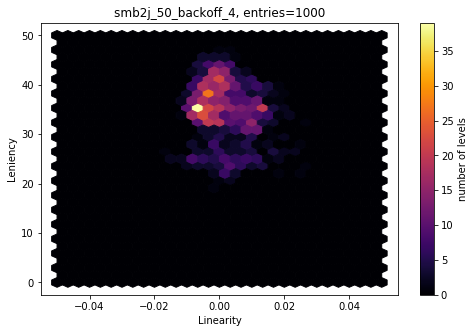

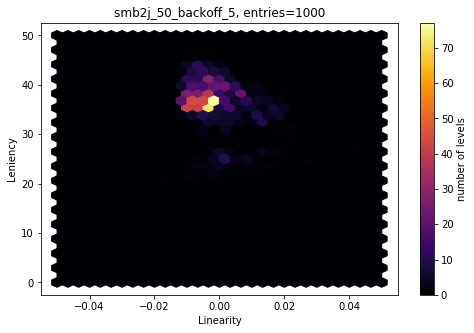

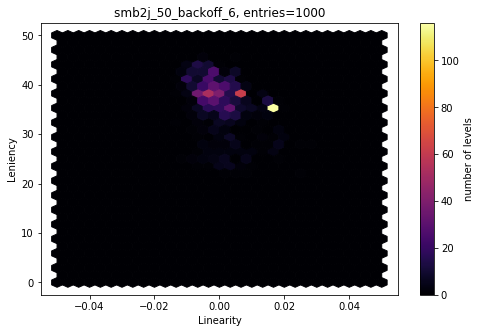

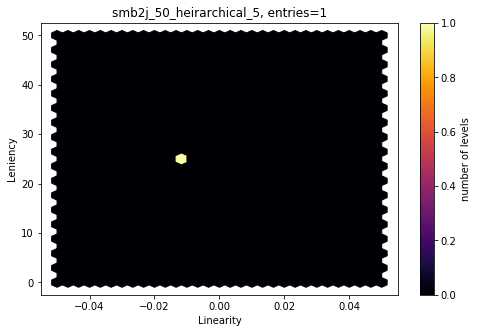

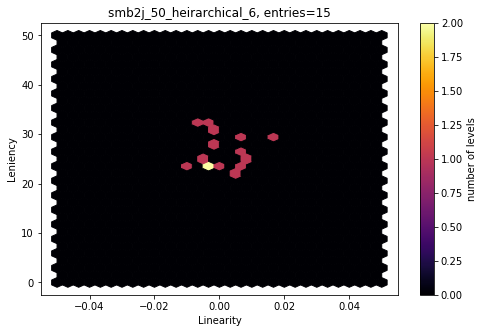

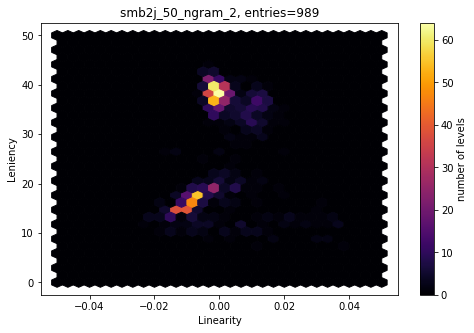

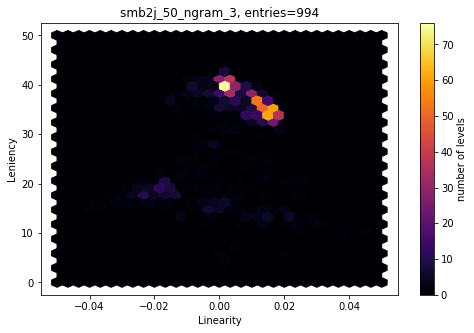

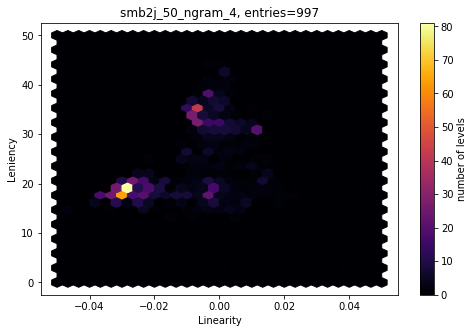

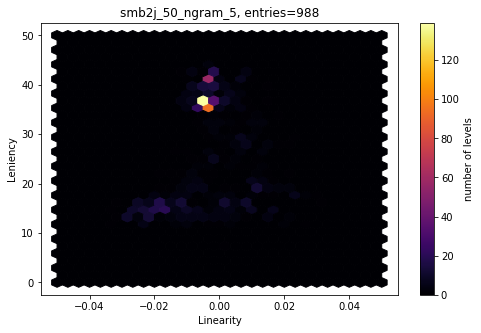

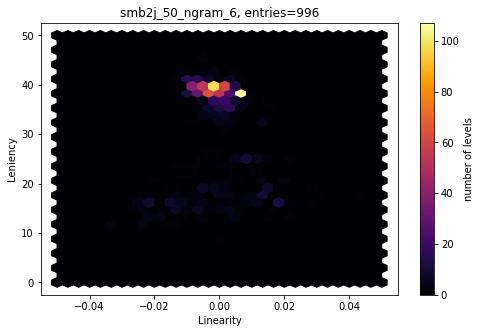

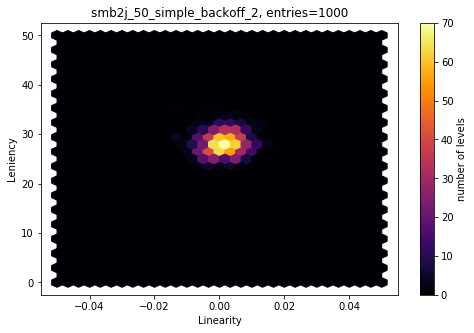

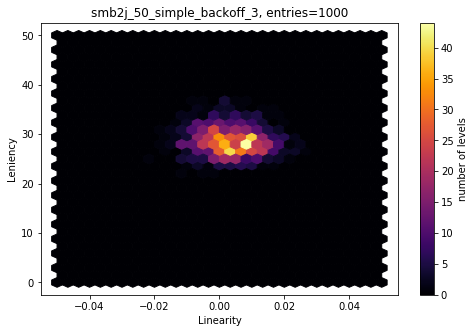

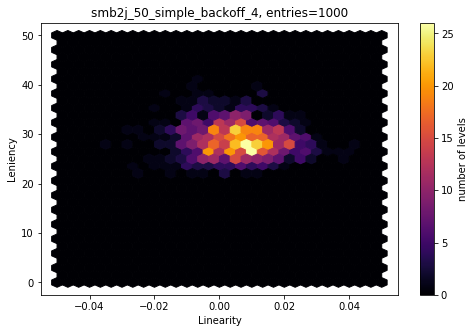

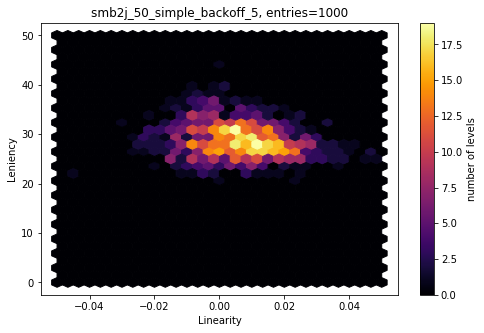

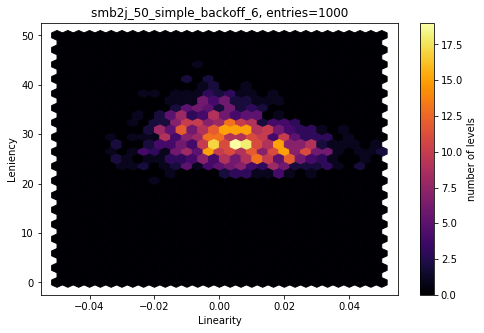

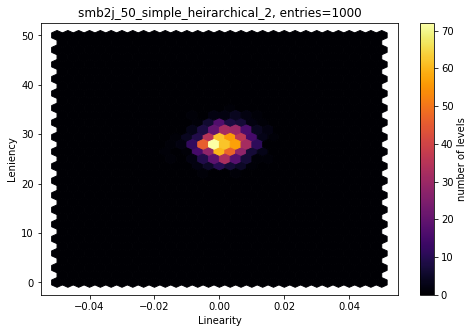

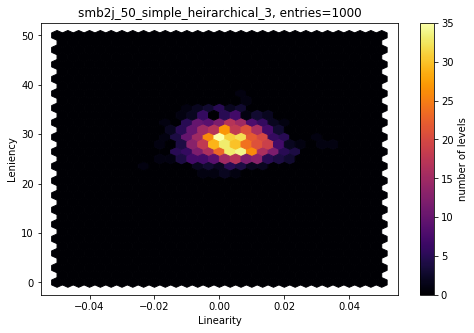

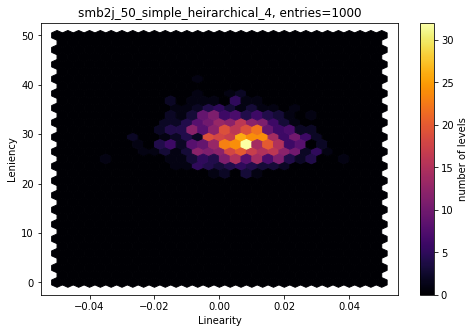

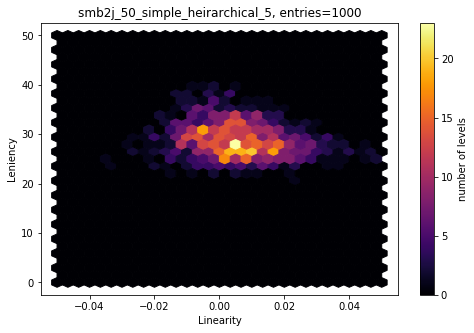

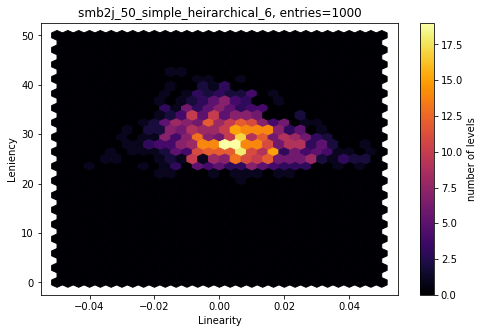

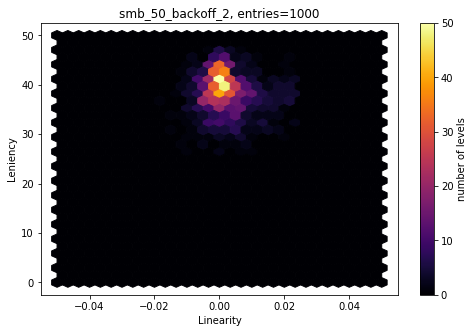

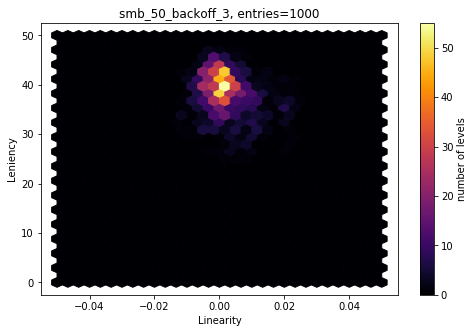

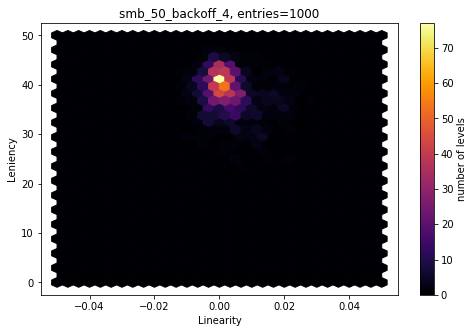

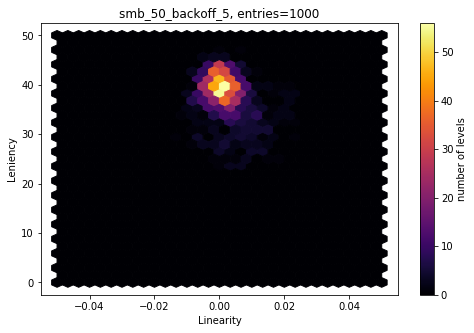

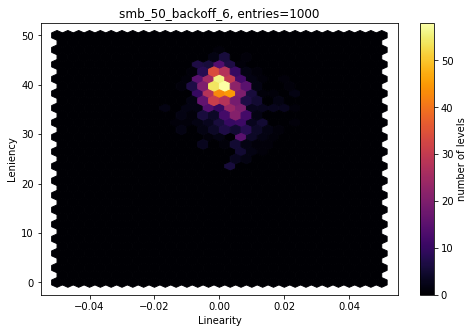

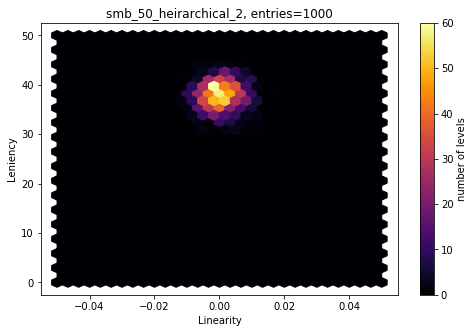

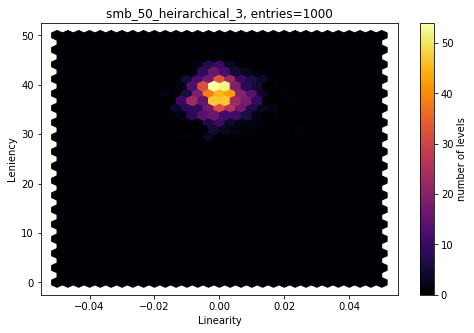

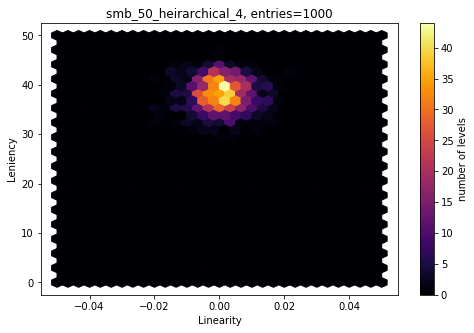

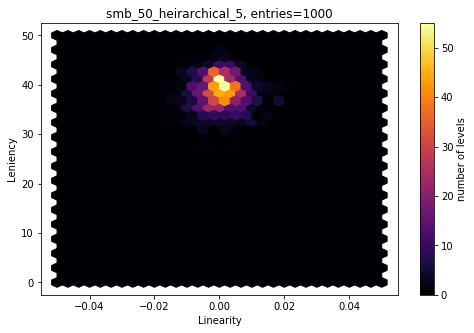

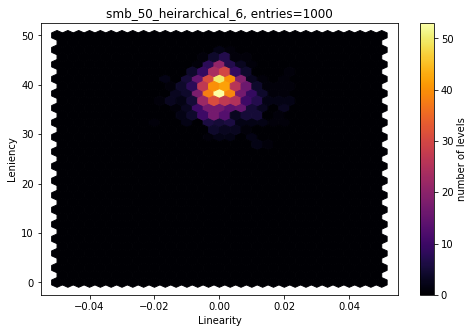

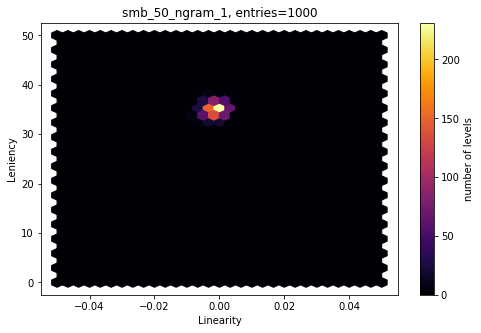

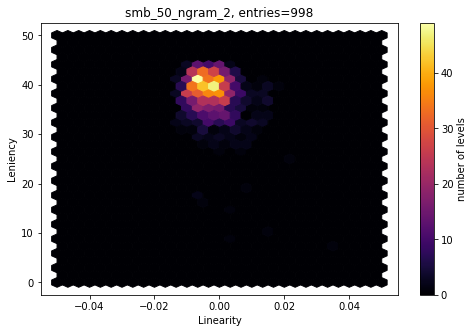

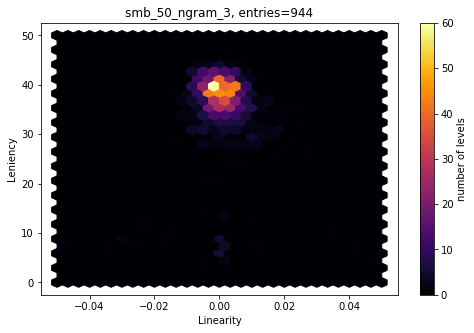

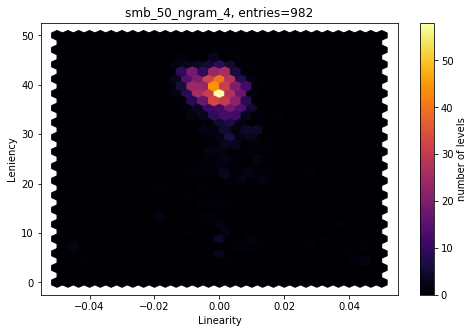

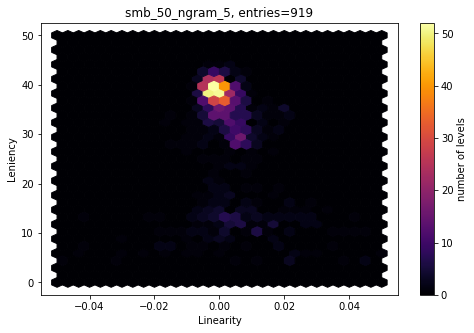

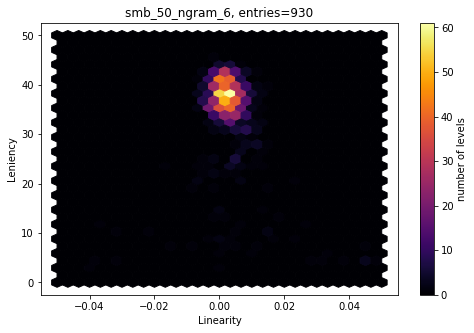

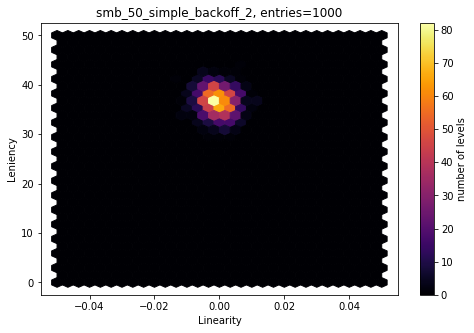

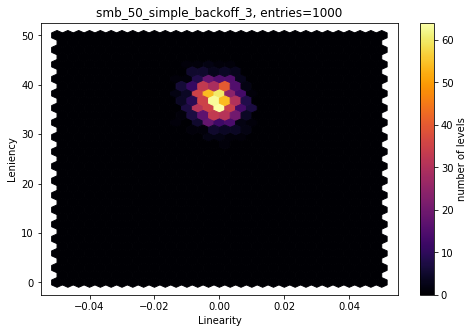

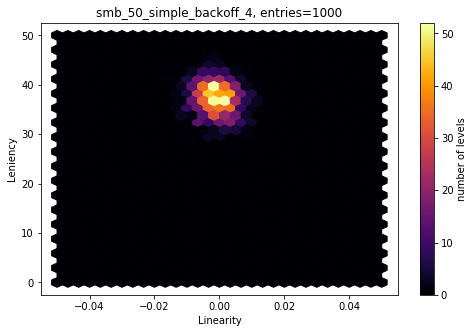

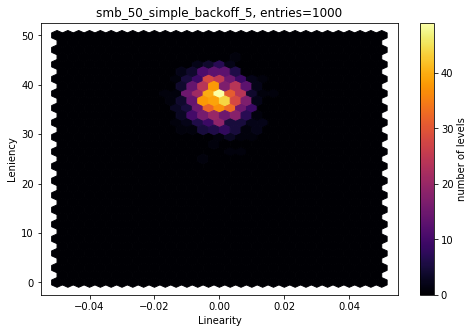

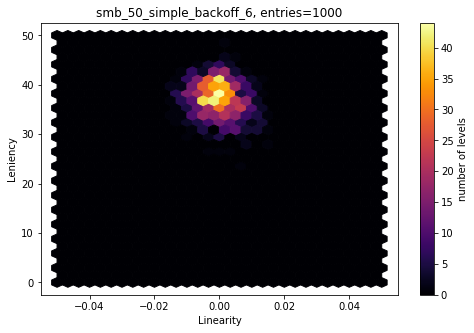

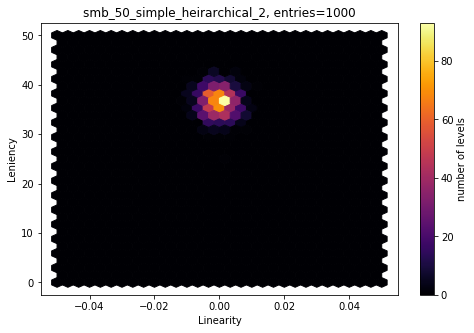

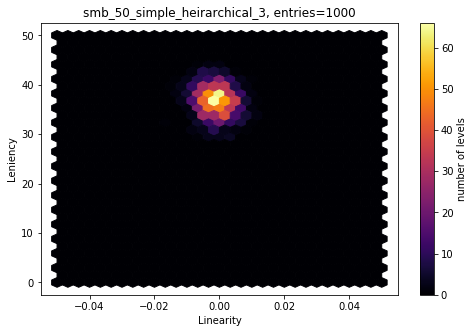

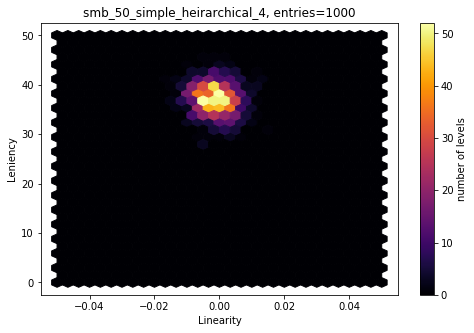

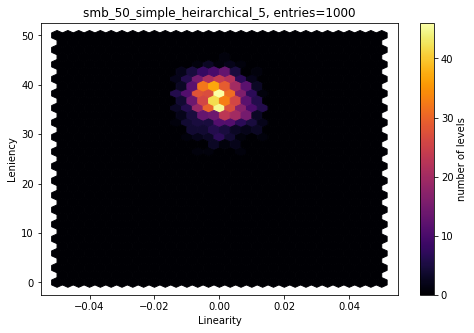

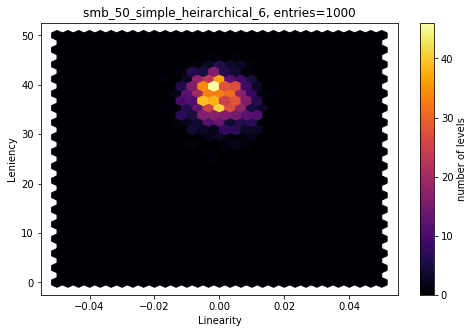

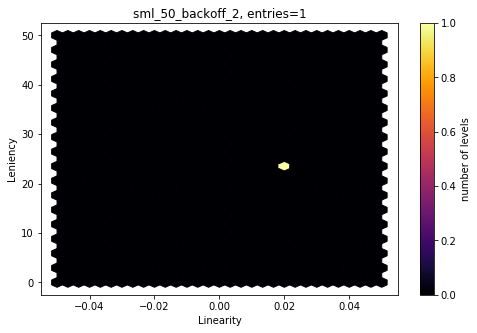

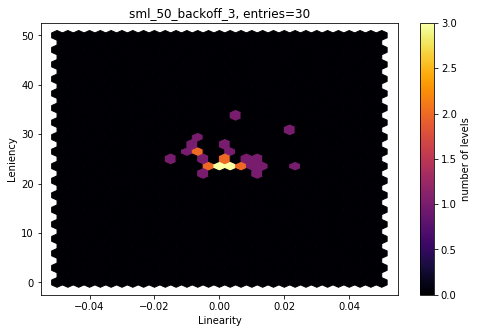

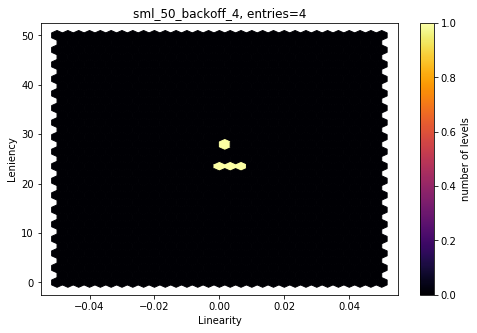

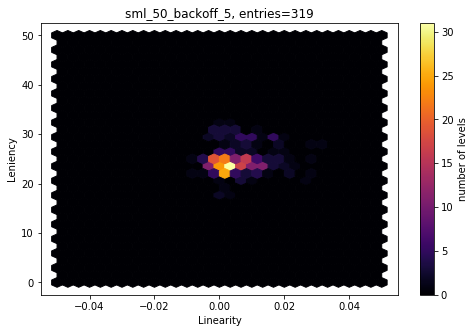

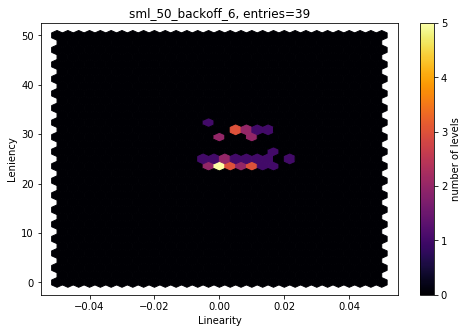

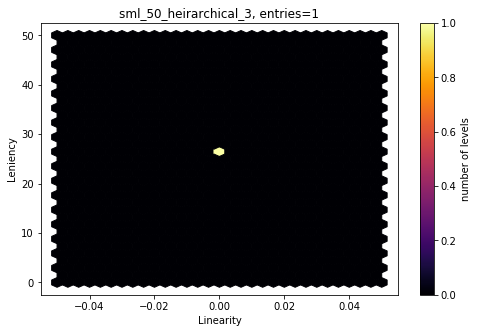

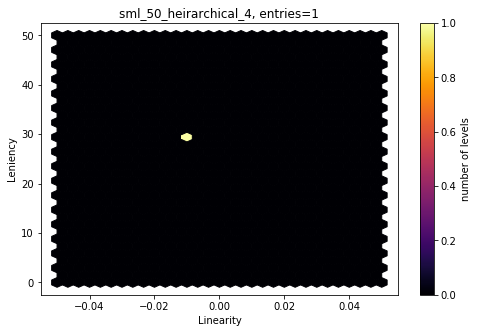

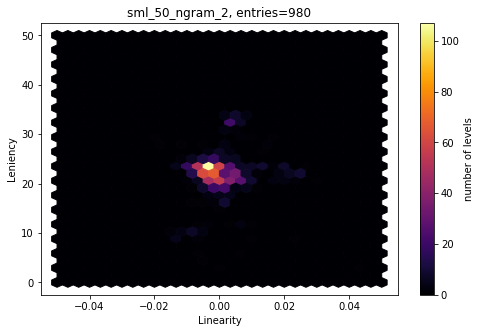

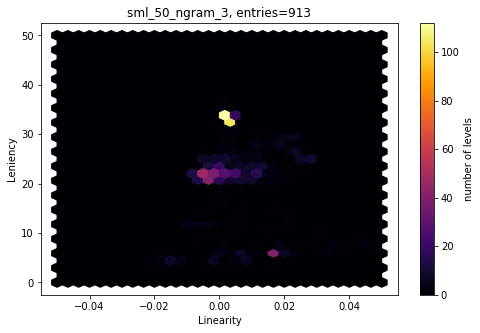

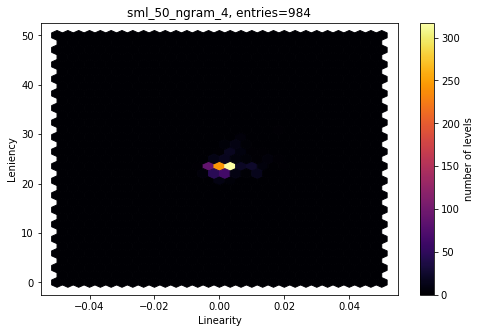

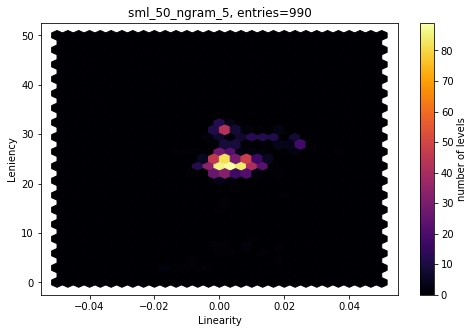

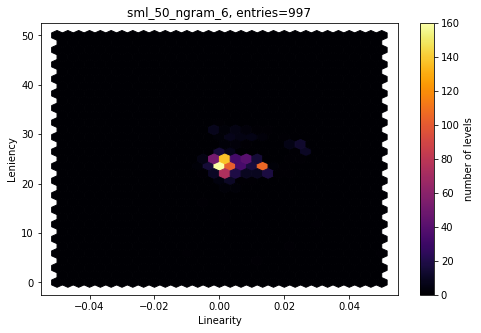

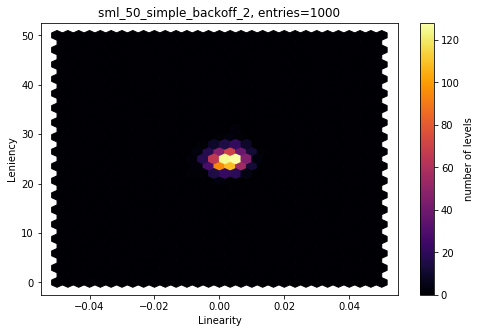

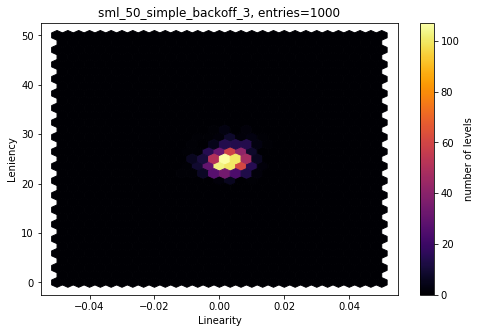

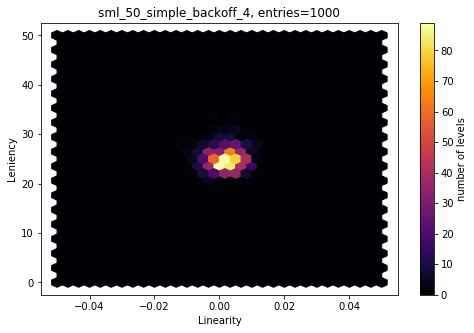

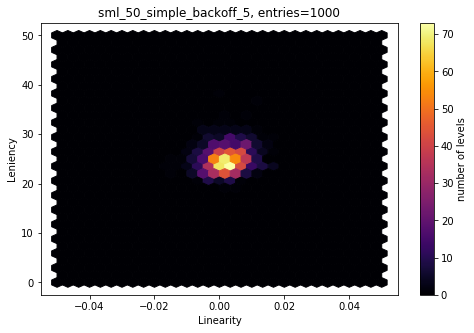

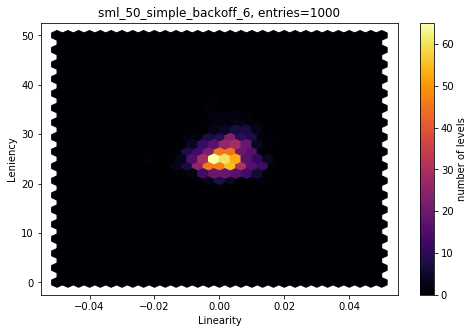

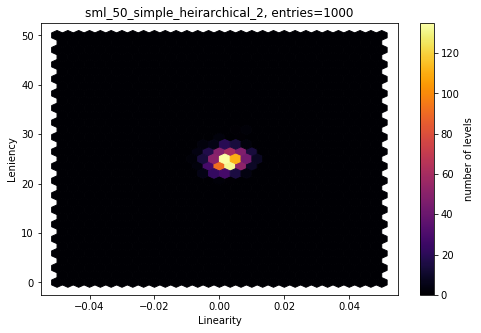

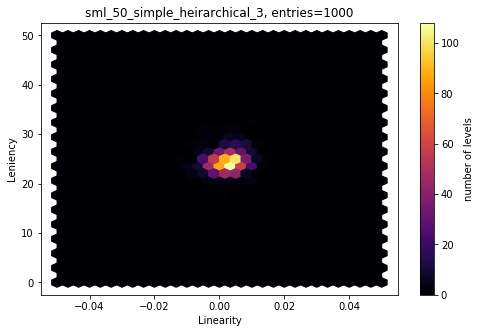

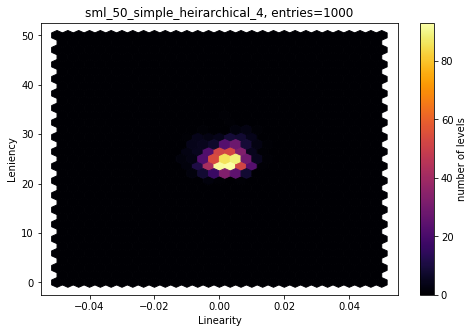

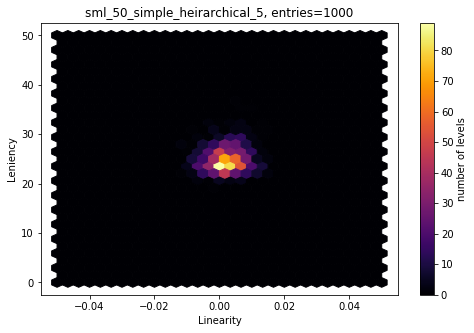

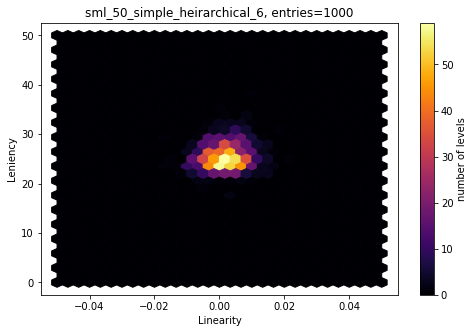

In [41]:
for key in sorted(data.keys()):
    if len(data[key][2]) == 0:
       continue
    
    fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(8, 5))
       
    hb = ax.hexbin(
        data[key][2], 
        data[key][3], 
        gridsize=30, 
        extent=[-0.05, 0.05, 0, 50], 
        cmap='inferno')
    
    ax.set_title(f'{key}, entries={len(data[key][2])}')
    ax.set_xlabel("Linearity")
    ax.set_ylabel("Leniency")
    
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('number of levels')

    plt.show()